# Supervivencia
## **Distribución de Weibull**
###### https://www.chreinvent.com/recursos/supervivencia

###  Análisis de la Vida Útil de Bombillas Industriales
Una empresa de manufactura de bombillas quiere **estimar la vida útil de sus productos** para dar una garantía adecuada a sus clientes. 
+ Las bombillas están sometidas a una serie de pruebas de desgaste acelerado para observar cuánto tiempo operan hasta que fallan. 
+ La distribución de tiempos de fallo se espera que siga una **distribución de Weibull** debido a las siguientes razones:

La distribución de Weibull es adecuada para analizar la vida útil de productos mecánicos y electrónicos.
+ Permite modelar tiempos de fallo cuando la tasa de fallo es variable: algunos productos tienen más probabilidad de fallo al principio de su vida útil,
    +  mientras que otros tienden a fallar más tarde.

#### Resolución
Recopilación de datos de tiempos de fallo: La empresa prueba 500 bombillas y registra los tiempos (en horas) hasta el fallo de cada bombilla. 
+ Este conjunto de datos representará los tiempos de supervivencia de las bombillas.

#### Ajuste de la distribución de Weibull a los datos: Se utiliza la distribución de Weibull para modelar estos tiempos de fallo. 
+ En este caso, el parámetro de forma de Weibull (`k`) indica el tipo de tasa de fallo:
    + Si `k < 1`: Los fallos ocurren más al inicio (fallo temprano).
    + Si `k = 1`: La tasa de fallo es constante (como en una distribución exponencial).
    + Si `k > 1`: Los fallos ocurren más tarde (fallo por desgaste).

#### Cálculo de parámetros clave:
+  Usamos Python y `scipy.stats.weibull_min` para ajustar la distribución y calcular los parámetros de la distribución de Weibull (forma y escala), 
    + lo cual permitirá hacer predicciones. 


Parámetro de forma ajustado: 1.62
Parámetro de escala ajustado: 1991.77


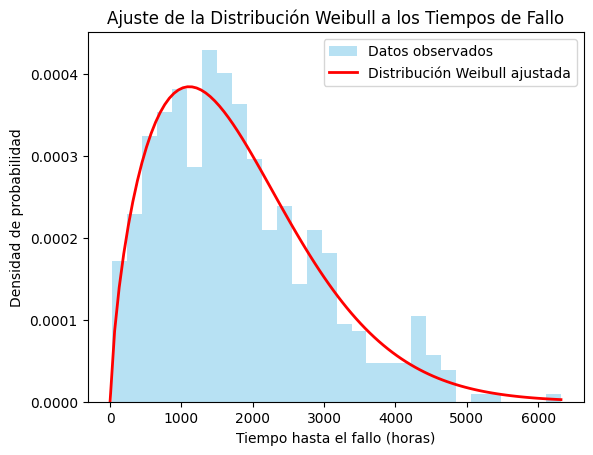

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Paso 1: Simulación de datos de tiempos de fallo (en horas) para 500 bombillas
# Usamos un parámetro de forma (Weibull Modulus) de 1.7 para simular desgaste
shape_param = 1.7  # Weibull modulus
scale_param = 2000  # Tiempo de vida promedio esperado (en horas)
weibull_dist = stats.weibull_min(shape_param, scale=scale_param)
failure_times = weibull_dist.rvs(500)

# Paso 2: Ajustar la distribución de Weibull a los datos
fitted_params = stats.weibull_min.fit(failure_times)
fitted_shape, fitted_loc, fitted_scale = fitted_params

print(f"Parámetro de forma ajustado: {fitted_shape:.2f}")
print(f"Parámetro de escala ajustado: {fitted_scale:.2f}")

# Paso 3: Graficar la distribución de Weibull ajustada y los datos observados
x = np.linspace(0, max(failure_times), 100)
pdf_fitted = stats.weibull_min.pdf(x, fitted_shape, loc=fitted_loc, scale=fitted_scale)

plt.hist(failure_times, bins=30, density=True, alpha=0.6, color='skyblue', label="Datos observados")
plt.plot(x, pdf_fitted, 'r-', lw=2, label="Distribución Weibull ajustada")
plt.xlabel("Tiempo hasta el fallo (horas)")
plt.ylabel("Densidad de probabilidad")
plt.title("Ajuste de la Distribución Weibull a los Tiempos de Fallo")
plt.legend()
plt.show()


**Interpretación de los resultados**
+ Parámetro de Forma: Si el parámetro de forma ajustado (`fitted_shape`) es mayor que 1, 
    + esto indicaría que los fallos de las bombillas tienden a ocurrir más a medida que pasa el tiempo (desgaste).
+ Parámetro de Escala: El parámetro de escala (`fitted_scale`) nos indica una estimación de la vida media o mediana esperada de las bombillas en horas. 
    + Este valor es útil para determinar un **período de garantía razonable**.

**Visualización**
+ El histograma de los tiempos de fallo observado, junto con la curva de densidad ajustada de Weibull, 
    + permite verificar si la distribución se ajusta adecuadamente a los datos.

**Implicancias prácticas**
1. Garantía del producto: Si la vida media estimada es de, digamos, 1991 horas, 
    + la empresa puede ofrecer una garantía que cubra un porcentaje significativo de la vida útil esperada, como 1600 horas.
2. Predicción de fallos: Con esta distribución, la empresa también puede hacer predicciones sobre la cantidad de bombillas 
    + que es probable que fallen dentro de ciertos intervalos de tiempo.
3. Este análisis ayuda a la empresa a entender mejor la **durabilidad de sus productos** y **gestionar expectativas** de calidad y duración con sus clientes.


__________________________________________________________________________________________________________________